<a href="https://colab.research.google.com/github/RustamChib/Graduation-Project-Fine-Indoor-Localization-Using-IMU-and-WiFi-Fusion/blob/RustamChib-patch-1/Graduation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import glob

path = '/content/drive/MyDrive/Graduation Project/samsung/train/csv_files_processed'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
data = frame.to_numpy()
print(frame)

           0      1      2      3  ...         mz          x          y         z
0     -100.0 -100.0 -100.0 -100.0  ...   7.430891  11.247705  21.427139  6.323562
1     -100.0 -100.0 -100.0 -100.0  ...   8.488937  11.268325  21.461499  6.323562
2     -100.0 -100.0 -100.0 -100.0  ...   9.330569  11.288946  21.495859  6.323562
3     -100.0 -100.0 -100.0 -100.0  ...  10.017527  11.309566  21.530219  6.323562
4     -100.0 -100.0 -100.0 -100.0  ...   9.753671  11.330187  21.564579  6.323562
...      ...    ...    ...    ...  ...        ...        ...        ...       ...
90420 -100.0  -89.0 -100.0  -86.0  ...  -3.443839   0.383340   3.947244  6.235806
90421 -100.0  -89.0 -100.0  -86.0  ...  -3.071389   0.376702   3.880484  6.235806
90422 -100.0  -89.0 -100.0  -86.0  ...  -3.520441   0.370064   3.813724  6.235806
90423 -100.0  -89.0 -100.0  -86.0  ...  -2.473423   0.363425   3.746964  6.235806
90424 -100.0  -89.0 -100.0  -86.0  ...  -2.468353   0.356787   3.680204  6.235806

[90425 rows x 2

In [ ]:
X_train = data[:,0:222]
Y_train = data[:,231:234]
print(X_train.shape)
print(Y_train.shape)
path_test = '/content/drive/MyDrive/Graduation Project/samsung/val/csv_files_processed/DATA_22122020_050318.csv'
df_test = pd.read_csv(path_test, low_memory = True) 
data_test = df_test.to_numpy()
X_test = data_test[:,0:222]
Y_test = data_test[:,231:234]
print('---------')
print(X_test.shape)
print(Y_test.shape)

(90425, 222)
(90425, 3)
---------
(5597, 222)
(5597, 3)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing
classifier = KNeighborsRegressor(n_neighbors=3)
#classifier = MultiOutputRegressor(LinearRegression())
classifier.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from scipy.spatial import distance

euclidean_sum = 0
N = len(Y_test)

for i in range (N):
  a = Y_test[[i], :]
  b = y_pred[[i], :]
  
  dst = distance.euclidean(a,b)
  euclidean_sum += dst
 
print(euclidean_sum/N)

28.12593788324445


(5597, 1)
(5597, 1)


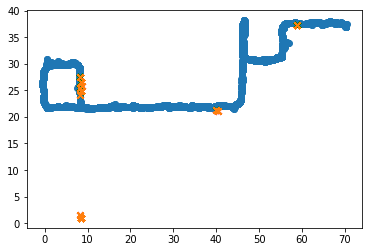

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

X_position_test = Y_test[:, [0]]
Y_position_test = Y_test[:, [1]]
X_position_pred = y_pred[:, [0]]
Y_position_pred = y_pred[:, [1]]
print(X_position_test.shape)
print(Y_position_test.shape)

plt.scatter(X_position_test, Y_position_test)
plt.scatter(X_position_pred, Y_position_pred, marker = 'x')
plt.show()